Manual K Value Used: 7
Predicted Optimal K Value: 3
KNN Accuracy: 80.43%
Decision Tree Accuracy: 73.19%


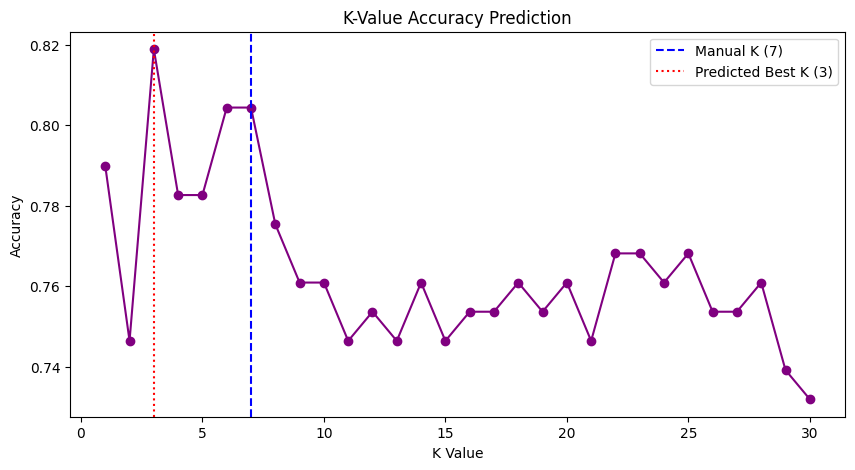

C:\Users\MRUGANK KAPSE\AppData\Local\Temp\ipykernel_30780\1615000166.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['KNN (K=5)', 'Decision Tree'], y=[knn_acc, dt_acc], palette='magma')


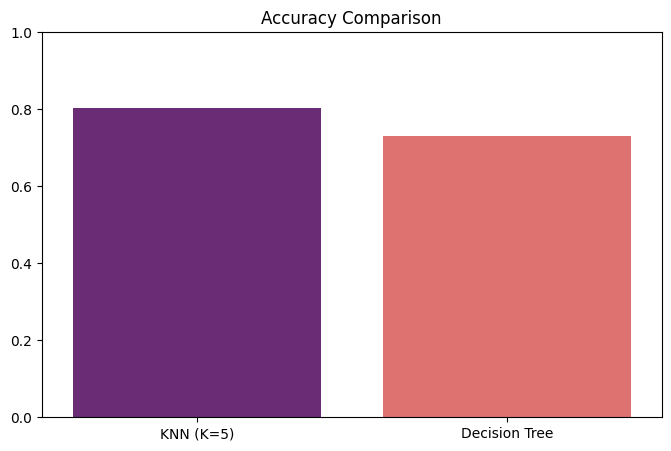

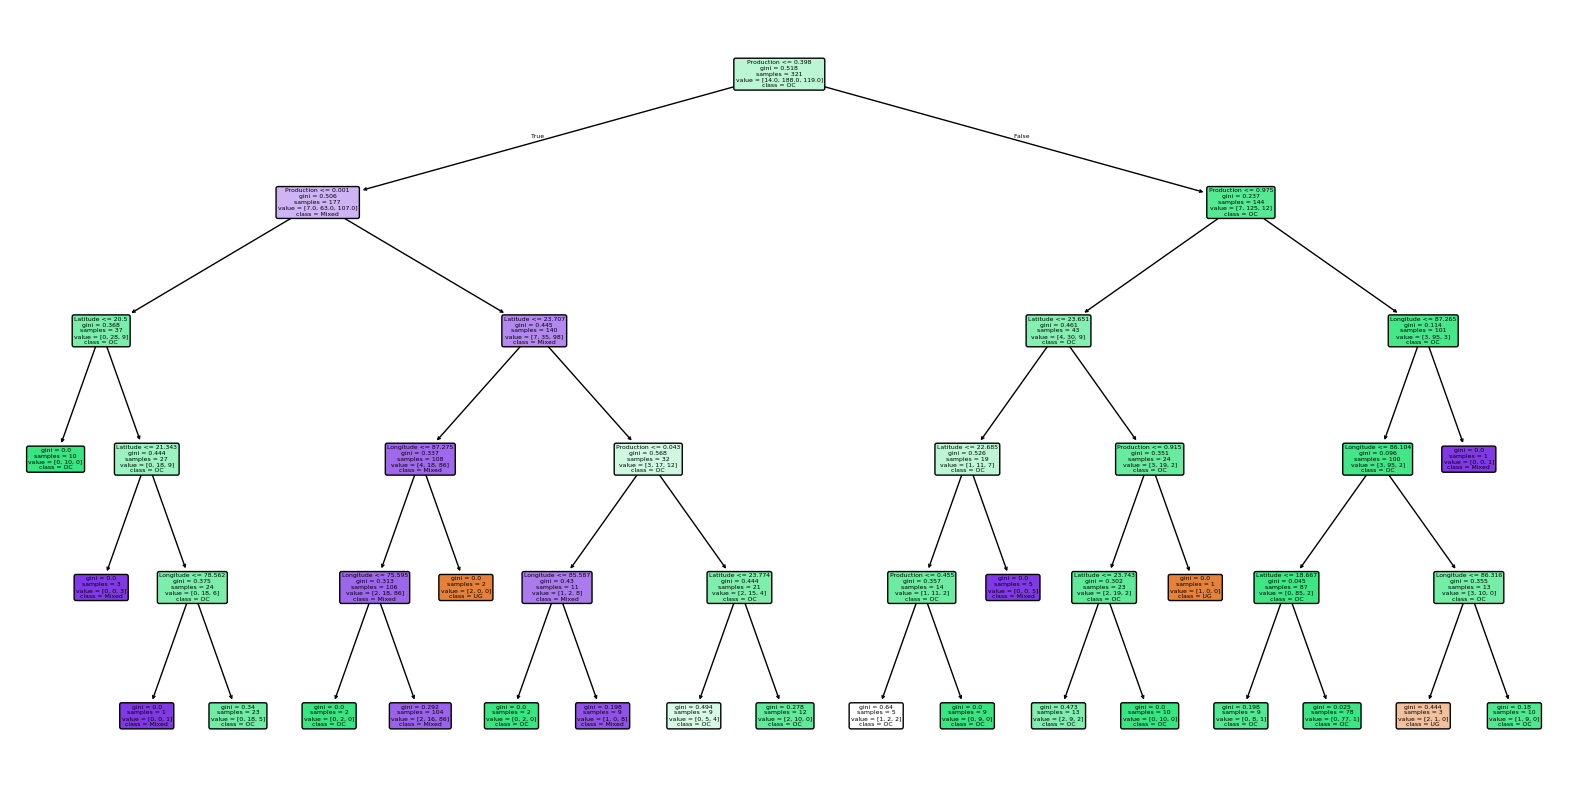

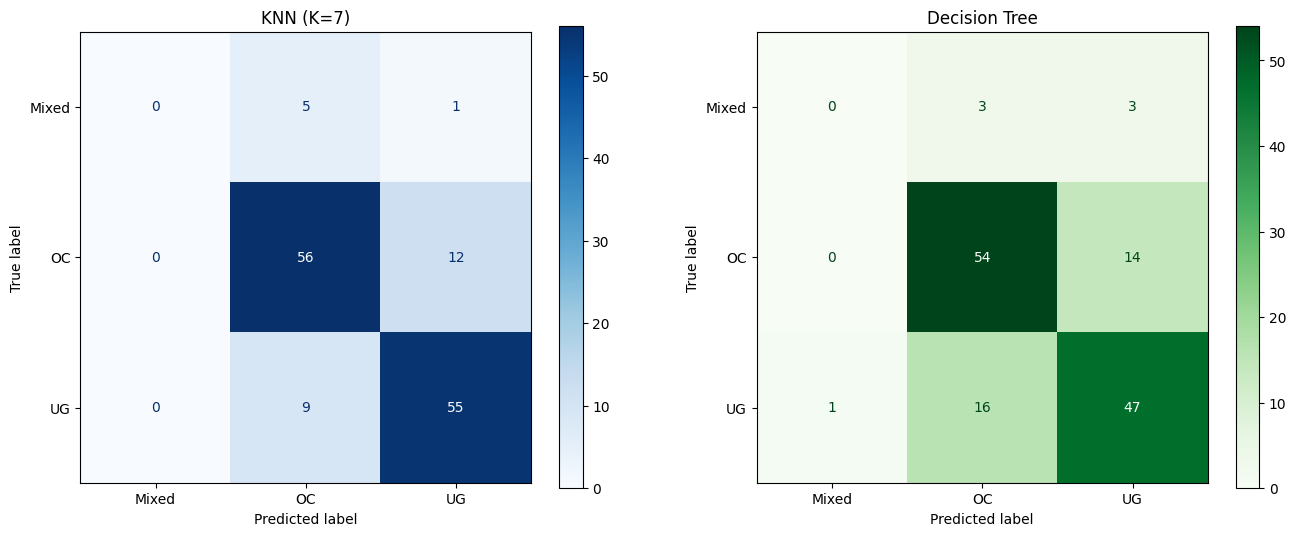

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
df = pd.read_csv(r"C:\Users\MRUGANK KAPSE\Downloads\Mines Datasheet-Tabelle 1.csv", sep=';')
df.columns = df.columns.str.strip()
def clean_numeric(val):
    if isinstance(val, str):
        val = val.replace(',', '.')
    try:
        return float(val)
    except:
        return np.nan
df['Latitude'] = df['Latitude'].apply(clean_numeric)
df['Longitude'] = df['Longitude'].apply(clean_numeric)
df['Production'] = df['Coal/ Lignite Production (MT) (2019-2020)'].apply(clean_numeric)

df_model = df.dropna(subset=['Latitude', 'Longitude', 'Production', 'Type of Mine (OC/UG/Mixed)']).copy()

X = df_model[['Latitude', 'Longitude', 'Production']]
y = df_model['Type of Mine (OC/UG/Mixed)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

manual_k = 7

k_values = range(1, 31)
acc_scores = []
for k_val in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k_val)
    knn_temp.fit(X_train, y_train)
    acc_scores.append(knn_temp.score(X_test, y_test))

optimal_k_predicted = k_values[np.argmax(acc_scores)]

knn_final = KNeighborsClassifier(n_neighbors=manual_k)
knn_final.fit(X_train, y_train)
knn_acc = knn_final.score(X_test, y_test)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_acc = dt_model.score(X_test, y_test)

print(f"Manual K Value Used: {manual_k}")
print(f"Predicted Optimal K Value: {optimal_k_predicted}")
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_acc * 100:.2f}%")

plt.figure(figsize=(10, 5))
plt.plot(k_values, acc_scores, marker='o', color='purple')
plt.axvline(x=manual_k, color='blue', linestyle='--', label=f'Manual K ({manual_k})')
plt.axvline(x=optimal_k_predicted, color='red', linestyle=':', label=f'Predicted Best K ({optimal_k_predicted})')
plt.title('K-Value Accuracy Prediction')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=['KNN (K=5)', 'Decision Tree'], y=[knn_acc, dt_acc], palette='magma')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, rounded=True)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ConfusionMatrixDisplay.from_predictions(y_test, knn_final.predict(X_test), ax=ax[0], cmap='Blues')
ax[0].set_title(f'KNN (K={manual_k})')
ConfusionMatrixDisplay.from_predictions(y_test, dt_model.predict(X_test), ax=ax[1], cmap='Greens')
ax[1].set_title('Decision Tree')
plt.show()